<a href="https://colab.research.google.com/github/vkjdinesh/Reseacrh/blob/main/FID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
#model = # prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

In [ ]:
# example of calculating the frechet inception distance in Keras for cifar10
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
#from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

In [ ]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)

In [ ]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [ ]:

# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
images1 = images1[:2]
images2 = images2[:2]
print('Loaded', images1.shape, images2.shape)

Loaded (2, 32, 32, 3) (2, 32, 32, 3)


In [ ]:
images1.shape

(2, 32, 32, 3)

In [ ]:

# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

Scaled (2, 299, 299, 3) (2, 299, 299, 3)
1/1 [==============================] - 0s 475ms/step
FID: 13.776


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-wn1o35cm
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-wn1o35cm
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184426 sha256=7b5a3d249d17c01417528497b5640bf1f268bef0daa822f965a5b07a3586839c
  Stored in directory: /tmp/pip-ephem-wheel-cache-ow9950d8/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

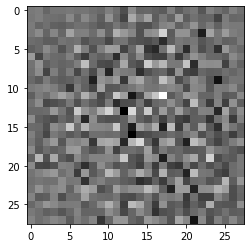

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
from tensorflow import datasets


ImportError: ignored

In [ ]:
# coding=utf-8
# Copyright 2019 The TensorFlow Datasets Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""Image datasets."""
from tensorflow_datasets.image.abstract_reasoning import AbstractReasoning
from tensorflow_datasets.image.aflw2k3d import Aflw2k3d
from tensorflow_datasets.image.arc import ARC


ModuleNotFoundError: ignored

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import json
import tensorflow.compat.v2 as tf
import tensorflow_datasets.public_api as tfds

In [ ]:

CITATION = """
@article{DBLP:journals/corr/LinMBHPRDZ14,
  author    = {Tsung{-}Yi Lin and
               Michael Maire and
               Serge J. Belongie and
               Lubomir D. Bourdev and
               Ross B. Girshick and
               James Hays and
               Pietro Perona and
               Deva Ramanan and
               Piotr Doll{\'{a}}r and
               C. Lawrence Zitnick},
  title     = {Microsoft {COCO:} Common Objects in Context},
  journal   = {CoRR},
  volume    = {abs/1405.0312},
  year      = {2014},
  url       = {http://arxiv.org/abs/1405.0312},
  archivePrefix = {arXiv},
  eprint    = {1405.0312},
  timestamp = {Mon, 13 Aug 2018 16:48:13 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/LinMBHPRDZ14},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}
"""

DESCRIPTION = """
COCO is a large-scale object detection, segmentation, and captioning dataset.
COCO has several features:
Object segmentation
Recognition in context
Superpixel stuff segmentation
330K images (>200K labeled)
1.5 million object instances
80 object categories
91 stuff categories
5 captions per image
250,000 people with keypoints
In this dataset, there are 414113 captions, but 82783 images. Each image-caption
pair is represented once in the dataset - thus, each image appears 5 times.
"""


In [ ]:
HOMEPAGE = "http://cocodataset.org/"

class CocoCaptions(tfds.core.GeneratorBasedBuilder):
  """MSCOCO Image Captioning Dataset - 2014"""

  VERSION = tfds.core.Version('0.0.1')

  def _info(self):
    return tfds.core.DatasetInfo(
        builder=self,
        description=DESCRIPTION,
        features=tfds.features.FeaturesDict({
            'image': tfds.features.Image(encoding_format='jpeg'),
                        'caption': tfds.features.Text()
          }),
        supervised_keys=('image', 'caption'),
        homepage=HOMEPAGE,
        citation=CITATION
    )

  def _split_generators(self, dl_manager):
    data_paths = dl_manager.download_and_extract({
        'images': 'http://images.cocodataset.org/zips/val2014.zip',
        'annotations': 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'
    })

    img_path, ann_path = data_paths['images'], data_paths['annotations']

    return [tfds.core.SplitGenerator(
                name=tfds.Split.VALIDATION,
                gen_kwargs={
                    "images_path": img_path + '/val2014',
                    "annotations_path": ann_path + '/annotations'
                })]

  def _generate_examples(self, images_path, annotations_path):
    """
    Generates examples as dictionaries of images and captions.
    Args:
      images_path: `str`, directory containing the images
      annotations_path: `str`, directory containing the annotations
    Yields:
      key (image id) and datapoint of (image, caption)
    """
    caption_file = '/captions_val2014.json'
    with tf.io.gfile.GFile(annotations_path + caption_file) as f:
      data = json.load(f)
    path_head = images_path + '/COCO_val2014_'    
    ann = data['annotations'] # Contains annotations

    img_names = [path_head + '%012d.jpg' % i['image_id'] for i in ann] 
    captions = ['<start> ' + i['caption'] + ' <end>' for i in ann]
    ids = [i['id'] for i in ann]

    # The above lines create the captions (start and end tokens), the 
    # image names (which consist of the path head and a 12 digit number,
    # right-aligned with the id), and the id to distinguish each unique image.

    for (i, name) in enumerate(img_names):
      yield ids[i], {
          'image': name,
          'caption': captions[i]
      }         

In [ ]:
"""MSCOCO Captioning Dataset from 2014."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow_datasets import testing
from tensorflow_datasets.image import coco_captions


class CocoCaptionsTest(testing.DatasetBuilderTestCase):
  DATASET_CLASS = coco_captions.CocoCaptions
  SPLITS = {
      "validation": 1
  }

  DL_EXTRACT_RESULT = {
      'images': '.',
      'annotations': '.'
  }

if __name__ == "__main__":
  testing.test_main()

ImportError: ignored

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load('mnist', split='train', shuffle_files=True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds = tfds.load('coco', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/4 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/82783 [00:00<?, ? examples/s]

ResourceExhaustedError: ignored

In [ ]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

In [ ]:
class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("/content/sample_data/images/mnist_%d.png" % epoch)
        plt.close()


In [ ]:
if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=2000, batch_size=32, save_interval=50)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 zero_padding2d_5 (ZeroPaddi  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_25 (Bat  (None, 8, 8, 64)         256       
 chNormalization)                                    

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inception_model = tf.keras.applications.InceptionV3(include_top=False, 
                              weights="imagenet", 
                              pooling='avg')


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
(train1_X, train1_y), (test1_X, test1_y) = mnist.load_data()

In [ ]:
print('X_train: ' + str(train1_X.shape))
print('Y_train: ' + str(train1_y.shape))
print('X_test:  '  + str(test1_X.shape))
print('Y_test:  '  + str(test1_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
BATCH_SIZE=32

In [ ]:
def compute_embeddings(dataloader, count):
    image_embeddings = []


    for _ in tqdm(range(count)):
        images = next(iter(dataloader))
        embeddings = inception_model.predict(images)


        image_embeddings.extend(embeddings)


    return np.array(image_embeddings)





In [ ]:
import math
import tqdm
count = math.ceil(2000/BATCH_SIZE)

#images = "/content/sample_data/images"
# compute embeddings for real images
real_image_embeddings = compute_embeddings(trainLoader, count)


# compute embeddings for generated images
#generated_image_embeddings = compute_embeddings(genloader, count)


real_image_embeddings.shape

TypeError: ignored

In [ ]:
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms

In [ ]:
# Transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)

In [ ]:
# Data
trainSet = datasets.MNIST(root='MNIST', download=True, train=True, transform=transform)
testSet = datasets.MNIST(root='MNIST', download=True, train=False, transform=transform)
trainLoader = dset.DataLoader(trainSet, batch_size=64, shuffle=True)
testLoader = dset.DataLoader(testSet, batch_size=64, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



NameError: ignored

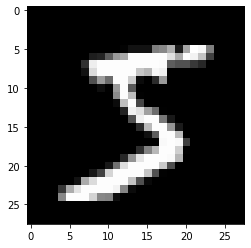

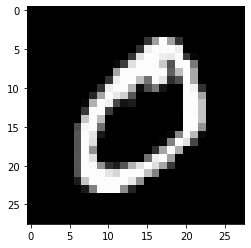

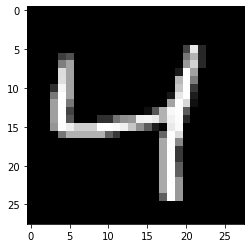

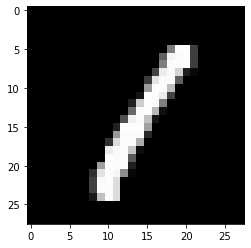

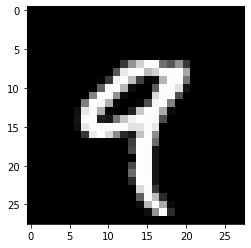

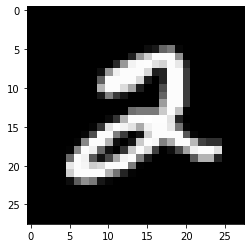

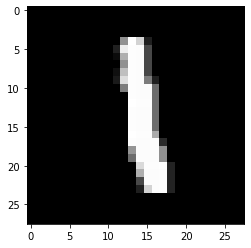

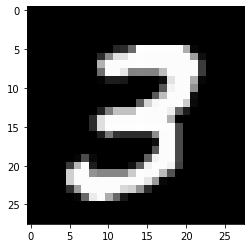

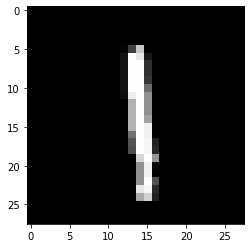

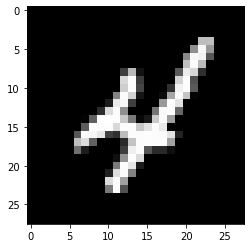

In [ ]:
from matplotlib import pyplot
for i in range(10):  
  #pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train1_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show(3,3

In [ ]:

!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
!pip install --upgrade botocore==1.29.59
!pip install --upgrade urllib3==1.26.7


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached botocore-1.29.59-py3-none-any.whl (10.4 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.23.26
    Uninstalling botocore-1.23.26:
      Successfully uninstalled botocore-1.23.26


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("mnist")

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/mnist/train'


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/fiftyone/mnist/tmp-download/MNIST/raw/train-images-idx3-ubyte.gz to /root/fiftyone/mnist/tmp-download/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/fiftyone/mnist/tmp-download/MNIST/raw/train-labels-idx1-ubyte.gz to /root/fiftyone/mnist/tmp-download/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/fiftyone/mnist/tmp-download/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/fiftyone/mnist/tmp-download/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/fiftyone/mnist/tmp-download/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/fiftyone/mnist/tmp-download/MNIST/raw

 100% |█████████████| 60000/60000 [43.5s elapsed, 0s remaining, 1.8K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 60000/60000 [43.5s elapsed, 0s remaining, 1.8K samples/s]      


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/mnist/test'


 100% |█████████████| 10000/10000 [6.8s elapsed, 0s remaining, 1.4K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [6.8s elapsed, 0s remaining, 1.4K samples/s]      


Dataset info written to '/root/fiftyone/mnist/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/mnist/info.json'


Loading 'mnist' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'mnist' split 'train'


 100% |█████████████| 60000/60000 [34.9s elapsed, 0s remaining, 1.7K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 60000/60000 [34.9s elapsed, 0s remaining, 1.7K samples/s]      


Loading 'mnist' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'mnist' split 'test'


 100% |█████████████| 10000/10000 [5.8s elapsed, 0s remaining, 1.7K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [5.8s elapsed, 0s remaining, 1.7K samples/s]      


Dataset 'mnist' created


INFO:fiftyone.zoo.datasets:Dataset 'mnist' created


In [ ]:
test_split = dataset.match_tags("train")

In [ ]:
print(test_split)


Dataset:     mnist
Media type:  image
Num samples: 60000
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
View stages:
    1. MatchTags(tags=['train'], bool=True, all=False)


In [ ]:
import cv2
import numpy as np

import fiftyone.brain as fob

# Construct a ``num_samples x num_pixels`` array of images
embeddings = np.array([
    cv2.imread(images, cv2.IMREAD_UNCHANGED).ravel()
    for f in test_split.values("filepath")
])

TypeError: ignored

In [ ]:
embeddings

array([[2, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
embeddings.shape

(60000, 784)

In [ ]:
from scipy import linalg

In [ ]:
 def calculate_fid(real_embeddings, generated_embeddings):
     # calculate mean and covariance statistics
     mu1, sigma1 = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
     mu2, sigma2 = generated_embeddings.mean(axis=0), np.cov(generated_embeddings,  rowvar=False)
     # calculate sum squared difference between means
     ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
     covmean = linalg.sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
     if np.iscomplexobj(covmean):
       covmean = covmean.real
     # calculate score
     fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
     return fid


 fid = calculate_fid(embeddings, embeddings)


In [ ]:
print(fid)

3.641278050022954e-05


In [ ]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("/content/sample_data/images/*.png")]

In [ ]:
images

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
# path
#path = r'/content/sample_data/images'
  
# Using cv2.imread() method
#img = cv2.imread(path)
  
# Displaying the image
cv2_imshow(images)

AttributeError: ignored

In [ ]:
!pip install -U image_embeddings # don't run this line if running this directly in the repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 15.8 MB/s eta 0:00:00
  Created wheel for image_embeddings: filename=image_embeddings-1.4.0-py3-none-any.whl size=13138 sha256=cdd24c712fced74f4be3fd26f679ff0075aefb816b2f6b52bedfc7f7a13daa5c
  Stored in directory: /root/.cache/pip/wheels/22/8e/bb/10e204b09a63a8f0f763fb56a8f792d8ea326e14a9c78f00d2
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=ccd3abfb068ccfa66e6dbbc578e7723627e91e6c81324050a726a93b6

In [ ]:
import image_embeddings

In [ ]:
# Let's define some paths where to save images, tfrecords and embeddings
from pathlib import Path
home = str(Path.home())
#(images1, _), (images2, _) = cifar10.load_data()

dataset = "cifar10"
path_images = f"{home}/{dataset}/images"
path_tfrecords = f"{home}/{dataset}/tfrecords"
path_embeddings = f"{home}/{dataset}/embeddings"

In [ ]:
test = image_embeddings.downloader.save_examples_to_folder(output_folder=path_images, images_count=1000, dataset=dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHFJR73/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHFJR73/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
print(test)

None


In [ ]:
image_embeddings.inference.write_tfrecord(image_folder=path_images,
                                          output_folder=path_tfrecords,
                                          num_shards=10)

Shard 0 saved after 0s
Shard 1 saved after 0s
Shard 2 saved after 0s
Shard 3 saved after 0s
Shard 4 saved after 1s
Shard 5 saved after 1s
Shard 6 saved after 1s
Shard 7 saved after 1s
Shard 8 saved after 1s
Shard 9 saved after 2s


In [ ]:
image_embeddings.inference.run_inference(tfrecords_folder=path_tfrecords,
                                         output_folder=path_embeddings,
                                         batch_size=1000)

1/1 [==============================] - 7s 7s/step

Shard 0 done after 11s
Shard 0 saved after 11s
1/1 [==============================] - 5s 5s/step

Shard 1 done after 17s
Shard 1 saved after 17s
1/1 [==============================] - 5s 5s/step

Shard 2 done after 22s
Shard 2 saved after 22s
1/1 [==============================] - 5s 5s/step

Shard 3 done after 27s
Shard 3 saved after 27s
1/1 [==============================] - 5s 5s/step

Shard 4 done after 38s
Shard 4 saved after 38s
1/1 [==============================] - 5s 5s/step

Shard 5 done after 48s
Shard 5 saved after 48s
1/1 [==============================] - 5s 5s/step

Shard 6 done after 59s
Shard 6 saved after 59s
1/1 [==============================] - 5s 5s/step

Shard 7 done after 64s
Shard 7 saved after 64s
1/1 [==============================] - 5s 5s/step

Shard 8 done after 69s
Shard 8 saved after 69s
1/1 [==============================] - 5s 5s/step

Shard 9 done after 80s
Shard 9 saved after 80s


In [ ]:
image_embeddings.inference.run_inference(tfrecords_folder=path_tfrecords,
                                         output_folder=path_embeddings,
                                         batch_size=1000)

1/1 [==============================] - 8s 8s/step

Shard 0 done after 8s
Shard 0 saved after 8s
1/1 [==============================] - 10s 10s/step

Shard 1 done after 28s
Shard 1 saved after 29s
1/1 [==============================] - 5s 5s/step

Shard 2 done after 39s
Shard 2 saved after 39s
1/1 [==============================] - 5s 5s/step

Shard 3 done after 44s
Shard 3 saved after 44s
1/1 [==============================] - 5s 5s/step

Shard 4 done after 55s
Shard 4 saved after 55s
1/1 [==============================] - 5s 5s/step

Shard 5 done after 65s
Shard 5 saved after 65s
1/1 [==============================] - 5s 5s/step

Shard 6 done after 76s
Shard 6 saved after 76s
1/1 [==============================] - 5s 5s/step

Shard 7 done after 86s
Shard 7 saved after 86s
1/1 [==============================] - 5s 5s/step

Shard 8 done after 96s
Shard 8 saved after 96s
1/1 [==============================] - 7s 7s/step

Shard 9 done after 104s
Shard 9 saved after 104s


In [ ]:
[id_to_name, name_to_id, embeddings] = image_embeddings.knn.read_embeddings(path_embeddings)
index = image_embeddings.knn.build_index(embeddings)

In [ ]:
embeddings

array([[-0.16858813, -0.12463162, -0.20045237, ..., -0.22892249,
        -0.11393525,  1.098657  ],
       [-0.12440898, -0.07322521, -0.11599518, ..., -0.1623526 ,
        -0.13535301,  1.2405062 ],
       [-0.13099891, -0.11021995, -0.18411376, ..., -0.10895408,
        -0.17082863,  1.1473558 ],
       ...,
       [-0.1248029 , -0.17625892, -0.20350578, ..., -0.05628128,
        -0.12885125,  1.0942973 ],
       [-0.16617794, -0.08113587, -0.16763975, ..., -0.08231901,
        -0.14121878,  1.1642275 ],
       [-0.15033624, -0.13629025, -0.1784356 , ..., -0.18799497,
        -0.14864407,  1.2947955 ]], dtype=float32)

In [ ]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
#from keras.datasets import cifar10

In [ ]:
# scale an array of images to a new size
def scale_images(images, new_shape):
 images_list = list()
 for image in images:
 # resize with nearest neighbor interpolation
  new_image = resize(image, new_shape, 0)
 # store
  images_list.append(new_image)
  return asarray(images_list)

In [ ]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
 # calculate activations
 act1 = model.predict(images1)
 act2 = model.predict(images2)
 # calculate mean and covariance statistics
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 # calculate sum squared difference between means
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 # calculate sqrt of product between cov
 covmean = sqrtm(sigma1.dot(sigma2))
 # check and correct imaginary numbers from sqrt
 if iscomplexobj(covmean):
  covmean = covmean.real
 # calculate score
  fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
  return fid

In [ ]:
from keras.datasets import cifar10
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

Loaded (10000, 32, 32, 3) (10000, 32, 32, 3)
Scaled (1, 299, 299, 3) (1, 299, 299, 3)
1/1 [==============================] - 0s 239ms/step


ValueError: ignored

In [ ]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# load cifar10 images
#(images1, _), (images2, _) = cifar10.load_data()
#shuffle(images1)
#images1 = images1[:10000]
#print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, embeddings, embeddings)
print('FID: %.3f' % fid)

NameError: ignored

In [ ]:
# example of calculating the frechet inception distance in Keras for cifar10
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10
 
# scale an array of images to a new size
def scale_images(images, new_shape):
 images_list = list()
 for image in images:
 # resize with nearest neighbor interpolation
  new_image = resize(image, new_shape, 0)
 # store
  images_list.append(new_image)
  return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
 # calculate activations
 act1 = model.predict(images1)
 act2 = model.predict(images2)
 # calculate mean and covariance statistics
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 # calculate sum squared difference between means
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 # calculate sqrt of product between cov
 covmean = sqrtm(sigma1.dot(sigma2))
 # check and correct imaginary numbers from sqrt
 if iscomplexobj(covmean):
  covmean = covmean.real
 # calculate score
  fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
  return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
images1 = np.array(images1)
images2 = np.array(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

Loaded (10000, 32, 32, 3) (10000, 32, 32, 3)
Scaled (1, 299, 299, 3) (1, 299, 299, 3)


1/1 [==============================] - 0s 233ms/step


ValueError: ignored

In [ ]:
import glob
data_dir = "/content/sample_data/images/"
list_imgs = glob.glob(data_dir + "*.png")
print(f"There are {len(list_imgs)} images in the dataset {data_dir}")


There are 0 images in the dataset /content/sample_data/images/


In [ ]:
!ls 

MNIST  path_images  sample_data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
from PIL import Image

info = []
for root, __, files in os.walk("/content/drive/MyDrive/animals/raw-img/scoiattolo"):
  for f in files:
      if f.endswith(".jpeg"):
         info.append({
                     "img": Image.open(os.path.join(root, f)), # add an appropriate reading flag if you want
                     # optional
                     # "foldername": os.path.dirname(root)
                     })


In [14]:
len(info)
type(info)

list

In [1]:
path = "/content/drive/MyDrive/animals/raw-img/scoiattolo"

In [2]:
import os
import cv2
import glob
images = os.listdir(path)

In [3]:
type(images)
len(images)

1863

In [4]:
img_data=[]
for img in images:
    img_arr=cv2.imread(os.path.join(path,img))
    img_data.append(img_arr)

In [5]:
img_data[1]

array([[[  0,  38,  72],
        [  0,  45,  77],
        [  6,  53,  85],
        ...,
        [  0,  87, 148],
        [  3,  84, 151],
        [  7,  82, 151]],

       [[  0,  39,  73],
        [  0,  45,  77],
        [  4,  51,  82],
        ...,
        [  0,  85, 146],
        [  0,  80, 145],
        [  0,  75, 144]],

       [[  0,  39,  72],
        [  0,  43,  76],
        [  1,  48,  79],
        ...,
        [  0,  80, 142],
        [  0,  74, 139],
        [  0,  69, 137]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
import matplotlib.pyplot as plt 
from tensorflow.keras.applications import InceptionV3
import numpy
import numpy as np
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
import numpy as np
import  scipy
import numpy as np
from scipy.linalg import sqrtm
import cmath

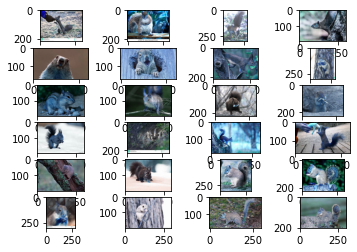

In [7]:
#plt.figure(figsize=(10,10))
for i in range(len(img_data[:24])):
    plt.subplot(6,4,i+1)
    plt.imshow(img_data[i])

In [14]:
images1 = img_data[:1000]

images2 = img_data[:1000]

In [15]:
# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        # store
        images_list.append(new_image)
    return asarray(images_list)

In [16]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [12]:
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

87910968/87910968 [==============================] - 3s 0us/step


In [17]:
# convert integer to floating point values
#images1 = images1.astype('float32')
#images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)


Scaled (1000, 299, 299, 3) (1000, 299, 299, 3)


In [18]:
 calculate_fid(model, images1, images2)

32/32 [==============================] - 200s 6s/step


-4.3327717620467847e-07

In [20]:
act1 = model.predict(images1)
act2 = model.predict(images2)
mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
covmean = sqrtm(sigma1.dot(sigma2))

32/32 [==============================] - 200s 6s/step


In [21]:
print(mu1, mu2)

[0.15263884 0.04497828 0.17465359 ... 0.3007769  0.18784092 0.00258716] [0.15263884 0.04497828 0.17465359 ... 0.3007769  0.18784092 0.00258716]


In [22]:
print(len(mu1))

2048


In [58]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
    def save_imgs(self, epoch):
        r, c = 2,2
        #noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/mnist_%d.png" % epoch)
        plt.close()






In [60]:
if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=1000, batch_size=32, save_interval=50)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                                 
 dropout_56 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_193 (Conv2D)         (None, 7, 7, 64)          18496     
                                                                 
 zero_padding2d_14 (ZeroPadd  (None, 8, 8, 64)         0         
 ing2D)                                                          
                                                                 
 batch_normalization_164 (Ba  (None, 8, 8, 64)         256       
 tchNormalization)                                   

In [38]:
 def save_imgs(self, epoch):
    import os
    sample_dir = 'samples'
    if not os.path.exists(sample_dir):
      os.makedirs(sample_dir)
    if(ep == epoch-1 ):
      fake_fname = 'fake-{0:0=4d}.png'.format(i)
      save_image(fake[i], os.path.join(sample_dir, fake_fname), nrow=1)

In [47]:
    def save_imgs(self, epoch):
        r, c = 0, 0
        #noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/mnist_%d.png" % epoch)
        plt.close()

In [50]:
if __name__ == '__main__':
    dcgan = DCGAN()
    dcgan.train(epochs=4000, batch_size=32, save_interval=50)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_157 (Conv2D)         (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                                 
 dropout_36 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_158 (Conv2D)         (None, 7, 7, 64)          18496     
                                                                 
 zero_padding2d_9 (ZeroPaddi  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_139 (Ba  (None, 8, 8, 64)         256       
 tchNormalization)                                   

ValueError: ignored

In [61]:
(X_train, _), (_, _) = mnist.load_data()

In [62]:
images1 = X_train[:10000]

In [ ]:
path = "/content/drive/MyDrive/animals/raw-img/scoiattolo"